In [2]:
import pandas as pd
import os
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
POMI_2017_2018 = pd.read_csv('data/POMI 2017_2021/POMI_APR2017_to_MAR2018.csv', sep = ',')
POMI_2018_2018 = pd.read_csv('data/POMI 2017_2021/POMI_APR2018_to_SEP2018.csv', sep = ',')
POMI_2018_2019 = pd.read_csv('data/POMI 2017_2021/POMI_OCT2018_to_MAR2019.csv', sep = ',')
POMI_2019_2020 = pd.read_csv('data/POMI 2017_2021/POMI_APR2019_to_MAR2020.csv', sep = ',')
POMI_2020_2021 = pd.read_csv('data/POMI 2017_2021/POMI_APR2020_to_MAR2021_v2.csv', sep = ',')

POMI_FILES = [POMI_2017_2018, 
POMI_2018_2018,
POMI_2018_2019, 
POMI_2019_2020, 
POMI_2020_2021]

POMI = pd.concat(POMI_FILES)


In [101]:
POMI.dtypes
POMI['report_period_end'] = pd.to_datetime(POMI['report_period_end'])
POMI['ccg_name'] = POMI['ccg_name'].str.upper()
POMI['practice_name'] = POMI['practice_name'].str.upper()
POMI.dtypes

report_period_end    datetime64[ns]
region_code                  object
region_name                  object
subregion_code               object
subregion_name               object
ccg_code                     object
ccg_name                     object
practice_code                object
practice_name                object
system_supplier              object
field                        object
value                       float64
dtype: object

In [5]:
POMI_all = pd.pivot_table(POMI, index = ['report_period_end', 'ccg_name', 'practice_name'], columns = 'field', values = 'value')
POMI_all

field                                                                                      New_Pat_Enbld  \
report_period_end ccg_name                                practice_name                                    
2017-04-30        NHS AIREDALE, WHARFEDALE AND CRAVEN CCG ADDINGHAM SURGERY                         11.0   
                                                          CROSS HILLS GROUP PRACTICE                22.0   
                                                          DYNELEY HOUSE SURGERY                     64.0   
                                                          FARFIELD GROUP PRACTICE                  158.0   
                                                          FISHER MEDICAL CENTRE                    107.0   
...                                                                                                  ...   
2021-03-31        NHS WOLVERHAMPTON CCG                   THORNLEY STREET SURGERY                   26.0   
                                                          TUDOR MEDICAL CENTRE                      40.0   
                                                          WARSTONES SURGERY                         10.0   
                                                          WEST PARK SURGERY                          2.0   
                                                          WHITMORE REANS MEDICAL PRACTICE           24.0   

field                                                                                      Pat_Appts_Enbld  \
report_period_end ccg_name                                practice_name                                      
2017-04-30        NHS AIREDALE, WHARFEDALE AND CRAVEN CCG ADDINGHAM SURGERY                          757.0   
                                                          CROSS HILLS GROUP PRACTICE                3052.0   
                                                          DYNELEY HOUSE SURGERY                     1947.0   
                                                          FARFIELD GROUP PRACTICE                   2108.0   
                                                          FISHER MEDICAL CENTRE                     3210.0   
...                                                                                                    ...   
2021-03-31        NHS WOLVERHAMPTON CCG                   THORNLEY STREET SURGERY                   1859.0   
                                                          TUDOR MEDICAL CENTRE                      2188.0   
                                                          WARSTONES SURGERY                          532.0   
                                                          WEST PARK SURGERY                         1205.0   
                                                          WHITMORE REANS MEDICAL PRACTICE           2470.0   

field                                                                                      Pat_Appts_Use  \
report_period_end ccg_name                                practice_name                                    
2017-04-30        NHS AIREDALE, WHARFEDALE AND CRAVEN CCG ADDINGHAM SURGERY                          2.0   
                                                          CROSS HILLS GROUP PRACTICE                 8.0   
                                                          DYNELEY HOUSE SURGERY                     44.0   
                                                          FARFIELD GROUP PRACTICE                   84.0   
                                                          FISHER MEDICAL CENTRE                    177.0   
...                                                                                                  ...   
2021-03-31        NHS WOLVERHAMPTON CCG                   THORNLEY STREET SURGERY                   97.0   
                                                          TUDOR MEDICAL CENTRE                       0.0   
                                                          WARSTONES SURGERY         

In [6]:
POMI_usage = POMI_all.drop(['New_Pat_Enbld','Pat_Appts_Enbld', 'Pat_DetCodeRec_Enbld','Pat_DetCodeRec_Use',	'Pat_Presc_Enbld','Sys_Appts_Enbld','Sys_DetCodeRec_Enbld','Sys_Presc_Enbld','Total_Pat_Enbld'], axis=1)
POMI_usage = POMI_usage.reset_index()
POMI_usage

field,report_period_end,ccg_name,practice_name,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
0,2017-04-30,"NHS AIREDALE, WHARFEDALE AND CRAVEN CCG",ADDINGHAM SURGERY,2.0,326.0,342.0,2908.0
1,2017-04-30,"NHS AIREDALE, WHARFEDALE AND CRAVEN CCG",CROSS HILLS GROUP PRACTICE,8.0,574.0,596.0,12043.0
2,2017-04-30,"NHS AIREDALE, WHARFEDALE AND CRAVEN CCG",DYNELEY HOUSE SURGERY,44.0,423.0,535.0,12105.0
3,2017-04-30,"NHS AIREDALE, WHARFEDALE AND CRAVEN CCG",FARFIELD GROUP PRACTICE,84.0,405.0,495.0,12877.0
4,2017-04-30,"NHS AIREDALE, WHARFEDALE AND CRAVEN CCG",FISHER MEDICAL CENTRE,177.0,485.0,690.0,14112.0
...,...,...,...,...,...,...,...
300104,2021-03-31,NHS WOLVERHAMPTON CCG,THORNLEY STREET SURGERY,97.0,200.0,4537.0,9866.0
300105,2021-03-31,NHS WOLVERHAMPTON CCG,TUDOR MEDICAL CENTRE,0.0,377.0,16302.0,19181.0
300106,2021-03-31,NHS WOLVERHAMPTON CCG,WARSTONES SURGERY,0.0,101.0,1671.0,4247.0
300107,2021-03-31,NHS WOLVERHAMPTON CCG,WEST PARK SURGERY,0.0,86.0,2093.0,3883.0


In [7]:
patient_list_size_check = POMI_usage[['report_period_end','patient_list_size']].groupby('report_period_end').sum()
patient_list_size_check 


field,patient_list_size
report_period_end,
2017-04-30,58046839.0
2017-05-31,57931484.5
2017-06-30,58010213.5
2017-07-31,57285995.5
2017-11-30,57437314.5
2018-01-31,58037927.5
2018-02-28,58106607.5
2018-03-31,58182341.0
2018-04-30,57854091.0


## Pat_Presc_Use since 2017

In [24]:
Pat_Presc_Usage = POMI_usage[['report_period_end','Pat_Presc_Use']].groupby('report_period_end').sum()
Pat_Presc_Usage = Pat_Presc_Usage.reset_index()
Pat_Presc_Usage

field,report_period_end,Pat_Presc_Use
0,2017-04-30,1981132.0
1,2017-05-31,2042427.0
2,2017-06-30,2008019.5
3,2017-07-31,2030681.5
4,2017-11-30,9280002.0
5,2018-01-31,13730853.0
6,2018-02-28,2265374.5
7,2018-03-31,2578319.5
8,2018-04-30,2576316.5
9,2018-05-31,2658427.0


<AxesSubplot:xlabel='report_period_end'>

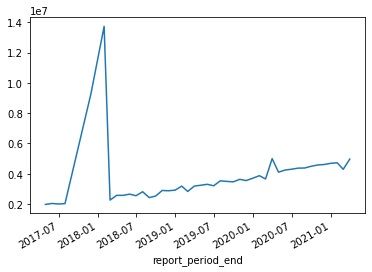

In [20]:
Pat_Presc_Usage['Pat_Presc_Use'].plot()

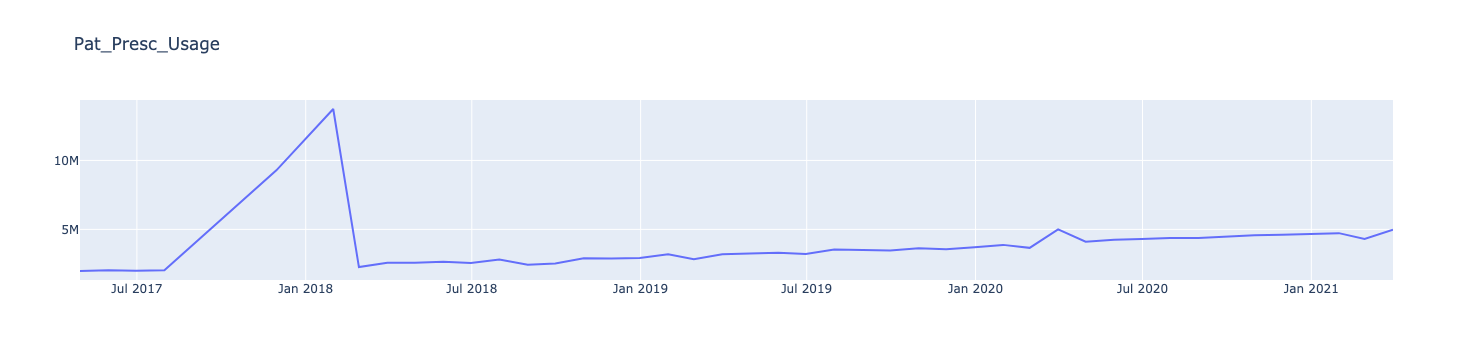

In [28]:
data0 = go.Scatter(
    x = Pat_Presc_Usage.report_period_end,
    y = Pat_Presc_Usage.Pat_Presc_Use,
    name = "Pat_Presc_Usage ")

layout = go.Layout(title = 'Pat_Presc_Usage')

figure = go.Figure(data = data0, layout = layout)
figure.show()

## Pat_Presc_Use since 2017 - London

SyntaxError: invalid syntax (<ipython-input-30-63f50ea63032>, line 1)

In [32]:
POMI_usage_london = POMI_usage[POMI_usage['ccg_name'].str.contains("LONDON")]
POMI_usage_london 

field,report_period_end,ccg_name,practice_name,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
1128,2017-04-30,NHS CENTRAL LONDON (WESTMINSTER) CCG,BELGRAVIA SURGERY,94.0,111.0,205.0,7326.0
1129,2017-04-30,NHS CENTRAL LONDON (WESTMINSTER) CCG,CAVENDISH HEALTH CENTRE,85.0,101.0,327.0,6233.0
1130,2017-04-30,NHS CENTRAL LONDON (WESTMINSTER) CCG,CONNAUGHT SQUARE PRACTICE,75.0,74.0,349.0,6980.0
1131,2017-04-30,NHS CENTRAL LONDON (WESTMINSTER) CCG,COVENT GARDEN MEDICAL CENTRE,17.0,60.0,80.0,2872.0
1132,2017-04-30,NHS CENTRAL LONDON (WESTMINSTER) CCG,CRAWFORD STREET SURGERY,26.0,31.0,58.0,5012.0
...,...,...,...,...,...,...,...
299861,2021-03-31,NHS WEST LONDON CCG,THE NOTTING HILL MEDICAL CENTRE,84.0,267.0,655.0,2746.0
299862,2021-03-31,NHS WEST LONDON CCG,THE PEMBRIDGE VILLAS SURGERY,0.0,228.0,1763.0,10812.0
299863,2021-03-31,NHS WEST LONDON CCG,THE REDCLIFFE SURGERY,21.0,1103.0,2388.0,10136.0
299864,2021-03-31,NHS WEST LONDON CCG,THE SURGERY,3.0,50.0,159.0,2776.0


In [60]:
POMI_usage_london_usage = POMI_usage_london[['ccg_name', 'Pat_Presc_Use', 'Pat_Appts_Use']].groupby('ccg_name').sum()
POMI_usage_london_usage = POMI_usage_london_usage.reset_index()
POMI_usage_london_usage

field,ccg_name,Pat_Presc_Use,Pat_Appts_Use
0,NHS CENTRAL LONDON (WESTMINSTER) CCG,341749.0,239870.0
1,NHS NORTH CENTRAL LONDON CCG,506310.0,77252.0
2,NHS SOUTH EAST LONDON,674542.0,126879.5
3,NHS SOUTH WEST LONDON CCG,661228.0,137069.0
4,NHS WEST LONDON CCG,305452.0,217693.5


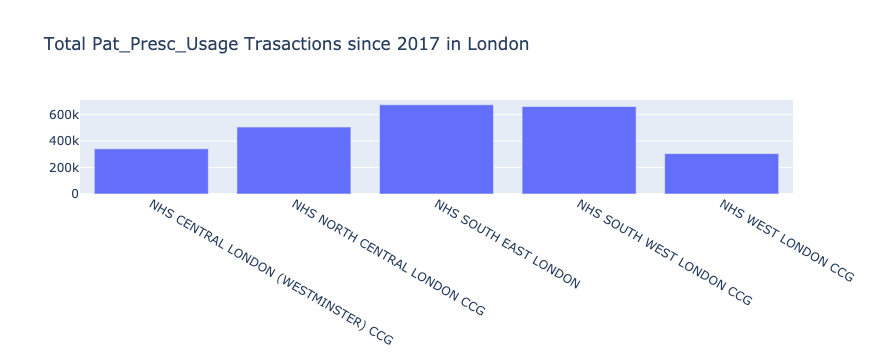

In [43]:
data0 = go.Bar(
    x = POMI_usage_london_usage.ccg_name,
    y = POMI_usage_london_usage.Pat_Presc_Use,
    name = "Pat_Presc_Usage ")

layout = go.Layout(title = 'Total Pat_Presc_Usage Trasactions since 2017 in London')

figure = go.Figure(data = data0, layout = layout)
figure.show()

In [59]:
POMI_usage_london_test = POMI_usage_london[['report_period_end', 'practice_name', 'ccg_name','Pat_Presc_Use', 'Pat_Appts_Use']].groupby['ccg_name', 'Pat_Appts_Use']
POMI_usage_london_test

TypeError: 'method' object is not subscriptable

In [51]:
POMI_usage_london_pivot = pd.pivot_table(POMI_usage_london, index = ['report_period_end'], columns = 'ccg_name', values = 'Pat_Presc_Use')
POMI_usage_london_pivot

ccg_name,NHS CENTRAL LONDON (WESTMINSTER) CCG,NHS NORTH CENTRAL LONDON CCG,NHS SOUTH EAST LONDON,NHS SOUTH WEST LONDON CCG,NHS WEST LONDON CCG
report_period_end,,,,,
2017-04-30,66.028571,NaN,NaN,NaN,49.616279
2017-05-31,78.500000,NaN,NaN,NaN,56.267442
2017-06-30,75.970588,NaN,NaN,NaN,54.790698
2017-07-31,80.363636,NaN,NaN,NaN,58.848837
2017-11-30,92.727273,NaN,NaN,NaN,65.697674
2018-01-31,118.272727,NaN,NaN,NaN,85.604651
2018-02-28,109.212121,NaN,NaN,NaN,79.220930
2018-03-31,140.030303,NaN,NaN,NaN,96.309524
2018-04-30,136.818182,NaN,NaN,NaN,97.964286


## Pat_Presc_Use per Capita - March 2021


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-62-67b19cc7f0b3>, line 1)

In [100]:
POMI_usage.report_period_end = POMI_usage.report_period_end.astype(str)
POMI_usage.practice_name = POMI_usage.practice_name.astype(str)
POMI_usage['ccg_name'] = POMI_usage['ccg_name'].astype(str) 
POMI_usage.dtypes

field
report_period_end     object
ccg_name              object
practice_name         object
Pat_Appts_Use        float64
Pat_Presc_Use        float64
Total_Use            float64
patient_list_size    float64
dtype: object

In [97]:
POMI_usage_march_2021 = POMI_usage[POMI_usage['report_period_end'] == '2021-03-31']
POMI_usage_march_2021 

field,report_period_end,ccg_name,practice_name,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
293572,2021-03-31,NHS BARKING AND DAGENHAM CCG,ABBEY MEDICAL CENTRE,0.0,164.0,8587.0,7146.0
293573,2021-03-31,NHS BARKING AND DAGENHAM CCG,AURORA MEDCARE,0.0,274.0,14065.0,18598.0
293574,2021-03-31,NHS BARKING AND DAGENHAM CCG,BARKING MEDICAL GROUP PRACTICE,83.0,343.0,11538.0,11392.0
293575,2021-03-31,NHS BARKING AND DAGENHAM CCG,DEWEY PRACTICE (DR CHRISTOPHER),0.0,88.0,2140.0,4050.0
293576,2021-03-31,NHS BARKING AND DAGENHAM CCG,DR A ARIF,20.0,80.0,2507.0,5127.0
...,...,...,...,...,...,...,...
300104,2021-03-31,NHS WOLVERHAMPTON CCG,THORNLEY STREET SURGERY,97.0,200.0,4537.0,9866.0
300105,2021-03-31,NHS WOLVERHAMPTON CCG,TUDOR MEDICAL CENTRE,0.0,377.0,16302.0,19181.0
300106,2021-03-31,NHS WOLVERHAMPTON CCG,WARSTONES SURGERY,0.0,101.0,1671.0,4247.0
300107,2021-03-31,NHS WOLVERHAMPTON CCG,WEST PARK SURGERY,0.0,86.0,2093.0,3883.0


In [103]:
POMI_usage_march_2021.to_csv('POMI_March_2021.csv')